In [ ]:
#Import thư viện
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Import dữ liệu
from google.colab import drive
drive.mount('/content/drive')
ori_train = pd.read_csv('/content/drive/MyDrive/DataFlow/train.csv')
ori_test = pd.read_csv('/content/drive/MyDrive/DataFlow/test.csv')
geography = pd.read_csv('/content/drive/MyDrive/DataFlow/geography.csv')
product = pd.read_csv('/content/drive/MyDrive/DataFlow/product.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Kích thước dữ liệu ban đầu
print(ori_train.shape)
print(ori_test.shape)
print(geography.shape)
print(product.shape)

(901561, 6)
(74682, 6)
(39948, 5)
(2412, 4)


In [ ]:
#Join bảng geography và product cho từng tập train và test
train = ori_train.merge(product, on="ProductID", how="left") \
             .merge(geography, on="Zip", how="left")

test = ori_test.merge(product, on="ProductID", how="left") \
           .merge(geography, on="Zip", how="left")
train.head()

,ProductID,Date,Zip,Units,Revenue,COGS,Category,Segment,Product,City,State,Region,District
0,1228,2013-07-31,78773,12,19648.44,12309.747660,Urban,Convenience,Pirum UC-30,"Austin, TX",TX,Central,District #23
1,781,2014-03-12,90501,16,20351.52,13497.128064,Rural,Productivity,Natura RP-69,"Torrance, CA",CA,West,District #37
2,2090,2013-11-29,44460,26,111367.62,91488.499830,Urban,Convenience,Currus UC-25,"Salem, OH",OH,East,District #14
3,1116,2018-08-29,30122,12,36280.44,21967.806420,Rural,Select,Pirum RS-04,"Lithia Springs, GA",GA,East,District #09
4,993,2013-04-27,75789,14,55557.18,48645.866808,Urban,Convenience,Natura UC-56,"Troup, TX",TX,Central,District #24


In [ ]:
len(train)

976243

In [ ]:
train = pd.concat([train, test], ignore_index=True)

+ ProductID: Mã sản phẩm
+ Date: Ngày giao dịch
+ Zip: Mã vùng bán hàng
+ Units: Số lượng sản phẩm bán ra
+ Revenue: Doanh thu
+ COGS: Giá vốn
+ Category: Nhóm sản phẩm
+ Segment: Loại sản phẩm (nhỏ hơn category)
+ Product: Tên sản phẩm
+ City: Thành phố tương ứng với mã zip
+ State: Bang của thành phố đó
+ Region: Khu vực lớn của bang
+ District: Khu vực hành chính nhỏ hơn


### Check the products with same data

In [ ]:
# train_filtered = train[train['ProductID'].isin([636])]
train_filtered = train[train['ProductID'].isin([642])]

# test_filtered = test[test['ProductID'].isin([636])]
test_filtered = test[test['ProductID'].isin([642])]

train_latest_date = train_filtered['Date'].max()
train_oldest_date = train_filtered['Date'].min()

test_latest_date = test_filtered['Date'].max()
test_oldest_date = test_filtered['Date'].min()

train_unique_states = train_filtered['State'].unique()
test_unique_states = test_filtered['State'].unique()


print("Train DataFrame:")
print(f"Latest: {train_latest_date}")
print(f"Oldest: {train_oldest_date}")


print("States:")
print(train_unique_states)


print("\nTest DataFrame:")
print(f"Latest: {test_latest_date}")
print(f"Oldest: {test_oldest_date}")

print("States:")
print(test_unique_states)

Train DataFrame:
Latest: 2012-12-22
Oldest: 2010-08-01
States:
['NY' 'CA' 'NV' 'KY' 'GA' 'AZ' 'UT' 'PA' 'WY' 'NJ' 'FL' 'NC' 'OR' 'MO'
 'MT' 'SC' 'WI' 'AL' 'TX' 'IA' 'NE' 'WV' 'ND' 'MI' 'OH' 'TN' 'WA' 'VA'
 'KS' 'IL' 'CT' 'MD' 'ID' 'IN' 'MA' 'CO' 'NM' 'MN' 'OK' 'AK' 'MS' 'LA'
 'AR']

Test DataFrame:
Latest: nan
Oldest: nan
States:
[]


In [ ]:
# train_filtered = train[train['ProductID'].isin([536])]
train_filtered = train[train['ProductID'].isin([542])]

# test_filtered = test[test['ProductID'].isin([536])]
test_filtered = test[test['ProductID'].isin([542])]

train_latest_date = train_filtered['Date'].max()
train_oldest_date = train_filtered['Date'].min()

test_latest_date = test_filtered['Date'].max()
test_oldest_date = test_filtered['Date'].min()


train_unique_states = train_filtered['State'].unique()
test_unique_states = test_filtered['State'].unique()


print("Train DataFrame:")
print(f"Latest: {train_latest_date}")
print(f"Oldest: {train_oldest_date}")


print("States:")
print(train_unique_states)


print("\nTest DataFrame:")
print(f"Latest: {test_latest_date}")
print(f"Oldest: {test_oldest_date}")

print("States:")
print(test_unique_states)

Train DataFrame:
Latest: 2014-10-14
Oldest: 2011-11-12
States:
['CA' 'NY' 'PA' 'WV' 'TX' 'MO' 'VA' 'NC' 'IA' 'UT' 'GA' 'AL' 'CT' 'MN'
 'CO' 'AZ' 'MD' 'OH' 'SC' 'WI' 'IN' 'OK' 'NM' 'IL' 'FL' 'ID' 'RI' 'TN']

Test DataFrame:
Latest: nan
Oldest: nan
States:
[]


conclusion: despite having the same data in Catergory, Segment, Product; it is hard to tell if 2 label ids are the same. <br>
---> do not need to combine same labels

## continue

In [ ]:
#Kích thước tập train mới
train.shape

(976243, 13)

In [ ]:
#Thông tin tập train
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 901561 entries, 0 to 901560
Data columns (total 13 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   ProductID  901561 non-null  int64  
 1   Date       901561 non-null  object 
 2   Zip        901561 non-null  int64  
 3   Units      901561 non-null  int64  
 4   Revenue    901561 non-null  float64
 5   COGS       901561 non-null  float64
 6   Category   901561 non-null  object 
 7   Segment    901561 non-null  object 
 8   Product    901561 non-null  object 
 9   City       901561 non-null  object 
 10  State      901561 non-null  object 
 11  Region     901561 non-null  object 
 12  District   901561 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 89.4+ MB


In [ ]:
#Kiểm tra giá trị null
train.isnull().sum()

,0
ProductID,0
Date,0
Zip,0
Units,0
Revenue,41
COGS,0
Category,0
Segment,0
Product,0
City,0


In [ ]:
train[train['Revenue'].isna()]['Date'].sort_values()

930940    2022-06-07
931661    2022-06-14
932256    2022-06-14
931991    2022-06-14
931137    2022-06-14
930888    2022-06-17
932252    2022-06-17
931020    2022-06-17
931658    2022-06-17
931120    2022-06-19
932063    2022-06-19
931676    2022-06-19
932012    2022-06-20
931506    2022-06-21
931158    2022-06-22
932361    2022-06-22
931233    2022-06-24
931387    2022-06-25
930906    2022-06-25
931265    2022-06-25
932061    2022-06-26
931172    2022-06-26
931070    2022-06-26
931384    2022-06-27
931242    2022-06-27
932187    2022-06-28
931651    2022-06-28
931107    2022-06-28
931024    2022-06-28
931301    2022-06-29
932107    2022-06-29
931848    2022-06-29
931023    2022-06-29
932111    2022-07-01
928266    2022-07-01
931465    2022-07-01
931403    2022-07-01
931150    2022-07-01
930963    2022-07-01
931843    2022-07-01
932368    2022-07-01
Name: Date, dtype: object


In [ ]:
from sklearn.linear_model import LinearRegression

df_known = train[train['Revenue'].notna()]
df_missing = train[train['Revenue'].isna()]

X_train = df_known[['COGS']]
y_train = df_known['Revenue']


## WHY Linear: because the Correlation of COGS and revnue is high
model = LinearRegression()
model.fit(X_train, y_train)

X_missing = df_missing[['COGS']]
train.loc[train['Revenue'].isna(), 'Revenue'] = model.predict(X_missing)


In [ ]:
train.isnull().sum()

,0
ProductID,0
Date,0
Zip,0
Units,0
Revenue,0
COGS,0
Category,0
Segment,0
Product,0
City,0


Kết luận: **Bộ dữ liệu không có giá trị null**

In [ ]:
#Số hàng bị trùng lặp
train.duplicated().sum()    #36

#Kiểm tra xem các hàng trùng lặp có quan trọng không (keep = False để lấy được tất cả các hàng trùng lặp)
train[train.duplicated(keep = False)]

,ProductID,Date,Zip,Units,Revenue,COGS,Category,Segment,Product,City,State,Region,District
47314,491,2017-04-01,72015,1,11339.37,11998.187397,Urban,Moderation,Maximus UM-96,"Benton, AR",AR,Central,District #25
47371,491,2017-04-01,72015,1,11339.37,11998.187397,Urban,Moderation,Maximus UM-96,"Benton, AR",AR,Central,District #25
72082,927,2012-04-01,89115,1,5417.37,5736.453093,Urban,Extreme,Natura UE-36,"Las Vegas, NV",NV,West,District #38
72902,927,2012-04-01,89115,1,5417.37,5736.453093,Urban,Extreme,Natura UE-36,"Las Vegas, NV",NV,West,District #38
74161,927,2014-06-01,55414,1,5669.37,6003.295893,Urban,Extreme,Natura UE-36,"Minneapolis, MN",MN,Central,District #28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
877676,2016,2014-06-01,54601,1,3716.37,1984.169943,Urban,Regular,Currus UR-19,"La Crosse, WI",WI,Central,District #27
908735,506,2021-08-30,80134,1,15245.37,14265.092709,Urban,Moderation,Maximus UM-11,"Parker, CO",CO,Central,District #20
908768,506,2021-08-30,80134,1,15245.37,14265.092709,Urban,Moderation,Maximus UM-11,"Parker, CO",CO,Central,District #20
912638,407,2022-06-01,31024,1,20505.87,20290.558365,Urban,Moderation,Maximus UM-12,"Eatonton, GA",GA,East,District #09


Kết luận:
**Ta thấy các hàng  lặp không liên tiếp \
=> Không phải do lỗi khi nhập dữ liệu mà do trùng trong giao dịch 2 lần giống nhau \
=> Giữ lại các hàng bị lặp**

In [ ]:
!pip install fuzzywuzzy python-Levenshtein

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.7/162.7 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 43.3 MB/s eta 0:00:00


In [ ]:
from fuzzywuzzy import process
import pandas as pd


unique_cities = train['City'].unique()

city_mapping = {}

threshold = 95

for city in unique_cities:
    match, score = process.extractOne(city, unique_cities)

    if score >= threshold and match != city:
        city_mapping[city] = match

print("City Mapping (Typo -> Correct):")
print(city_mapping)

KeyboardInterrupt: 

In [ ]:
train['City'] = train['City'].replace(city_mapping)
print("\nCleaned DataFrame:")
print(train)

In [ ]:
#Số lượng giá trị duy nhất ở mỗi cột
train.nunique()

,0
ProductID,1624
Date,3718
Zip,31194
Units,34
Revenue,3071
COGS,9108
Category,4
Segment,8
Product,1465
City,23856


**Kết luận:**
- **Số giá trị khác biệt ở các cột khá hợp lý, không cần bỏ cột nào**
- **Các cột Product, City, District quá cụ thể và không có quá nhiều ý nghĩa cho việc phân tích, các thông tin này đã được thể hiện ở các cột khác nên dự đoán có thể xóa đi để giảm kích thước dữ liệu.**


In [ ]:
train.to_excel("final.xlsx")

In [ ]:
train.drop(['Product', 'City', 'District'], axis = 1, inplace = True)

In [ ]:
train.columns

Index(['ProductID', 'Date', 'Zip', 'Units', 'Revenue', 'COGS', 'Category',
       'Segment', 'State', 'Region'],
      dtype='object')

In [ ]:
train.duplicated().sum()

36

Kết luận: **Số lượng dữ liệu bị lặp giữ nguyên \
==> Các cột đã xóa không ảnh hưởng đến kết quả**

In [ ]:
#Phân tích thống kê cơ bản cho các trường dữ liệu số
train.describe()

,ProductID,Zip,Units,Revenue,COGS
count,901561.000000,901561.000000,901561.000000,901561.000000,901561.000000
mean,1233.645150,55701.784368,1.030295,5653.001536,4647.404499
std,691.327919,28987.405284,0.327194,4501.301471,3959.413750
min,1.000000,1001.000000,1.000000,427.770000,214.526655
25%,689.000000,31014.000000,1.000000,2078.370000,1841.163597
50%,989.000000,54521.000000,1.000000,4566.240000,3693.018420
75%,2045.000000,83709.000000,1.000000,8189.370000,6509.314350
max,2412.000000,99950.000000,44.000000,334548.900000,306918.186750


Nhận xét: **Có sự chênh lệch lớn giữa giá trị 75% và max của các cột Units, Revenue, COGS \
=> Có thể xuất hiện outliners ở các cột này**

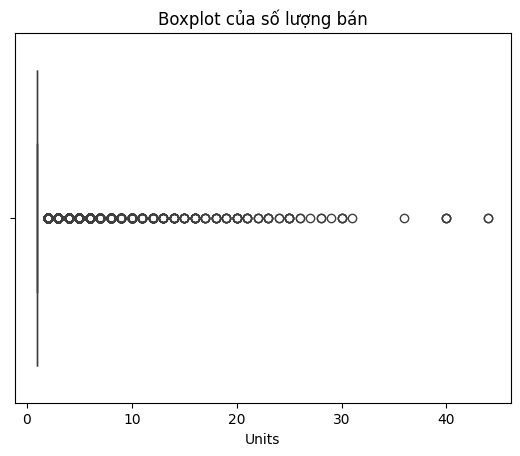

In [ ]:
sns.boxplot(x=train["Units"])
plt.title("Boxplot của số lượng bán")
plt.show()

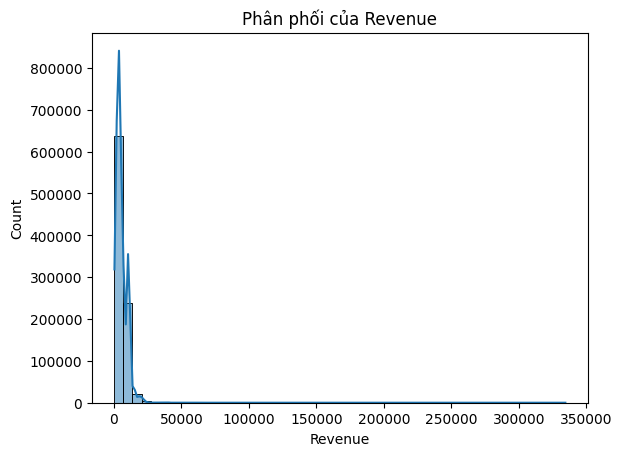

In [ ]:
sns.histplot(train["Revenue"], bins=50, kde=True)
plt.title("Phân phối của Revenue")
plt.show()

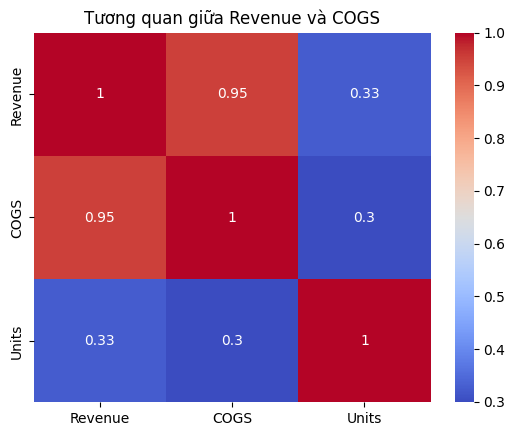

In [ ]:
# train['Date'] = pd.to_datetime(train['Date'])
# train['Date_type'] = (train['Date'] - train['Date'].min()).dt.days

corr = train[['Revenue', 'COGS', "Units"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Tương quan giữa Revenue và COGS")
plt.show()

In [ ]:
inconsistent_states = {}
inconsistent_product_ids = set()
# state_region_check = train.groupby('State')['Region'].nunique() > 1
# state_district_check = train.groupby('State')['District'].nunique() > 1


for state, group in train.groupby('State'):
    unique_regions = group['Region'].nunique()
    unique_districts = group['District'].nunique()

    if unique_regions > 1 or unique_districts > 1:
        inconsistent_states[state] = { "Unique Regions": group['Region'].unique(), "Unique Districts": group['District'].unique()}
        inconsistent_product_ids.update(group['ProductID'].tolist())
print("Inconsistent States:")
for state, details in inconsistent_states.items():
    print(f"State: {state}")
    print(f"  Unique Regions: {details['Unique Regions']}")
    print(f"  Unique Districts: {details['Unique Districts']}")
    print()

# inconsistent_states_region = state_region_check[state_region_check].index.tolist()
# inconsistent_states_district = state_district_check[state_district_check].index.tolist()


# print(inconsistent_states_region)
# print(inconsistent_states_district)

print("ProductIDs with Inconsistencies:")
print(sorted(inconsistent_product_ids))

Inconsistent States:
State: AL
  Unique Regions: ['East' 'Central']
  Unique Districts: ['District #19' 'District #09' 'District #24']

State: AR
  Unique Regions: ['Central']
  Unique Districts: ['District #25' 'District #21' 'District #24']

State: AZ
  Unique Regions: ['West']
  Unique Districts: ['District #39' 'District #38']

State: CA
  Unique Regions: ['West']
  Unique Districts: ['District #37' 'District #38' 'District #35' 'District #36'
 'District #39']

State: CO
  Unique Regions: ['Central' 'West']
  Unique Districts: ['District #20' 'District #39' 'District #30' 'District #21']

State: CT
  Unique Regions: ['East']
  Unique Districts: ['District #02' 'District #03' 'District #01']

State: DC
  Unique Regions: ['East']
  Unique Districts: ['District #07' 'District #05']

State: DE
  Unique Regions: ['East']
  Unique Districts: ['District #04' 'District #05']

State: FL
  Unique Regions: ['East']
  Unique Districts: ['District #10' 'District #12' 'District #09']

State: GA


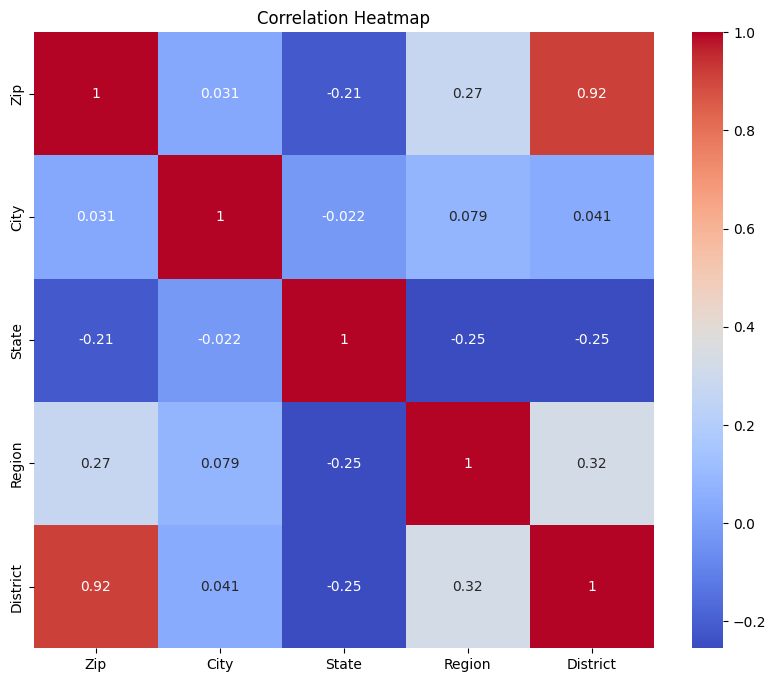

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


# THE DATA IS TOO BIG
# train_numeric = pd.get_dummies(train, columns=["Zip", "City", "State", "Region", "District"])
# corr = train_numeric.corr()


train['City'] = le.fit_transform(train['City'])
train['State'] = le.fit_transform(train['State'])
train['Region'] = le.fit_transform(train['Region'])
train['District'] = le.fit_transform(train['District'])

corr = train[['Zip', 'City', 'State', 'Region', 'District']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

Nhận xét : **Revenue và COGS tương quan rất cao (95%) nên không đóng góp nhiều trong việc train mô hình**

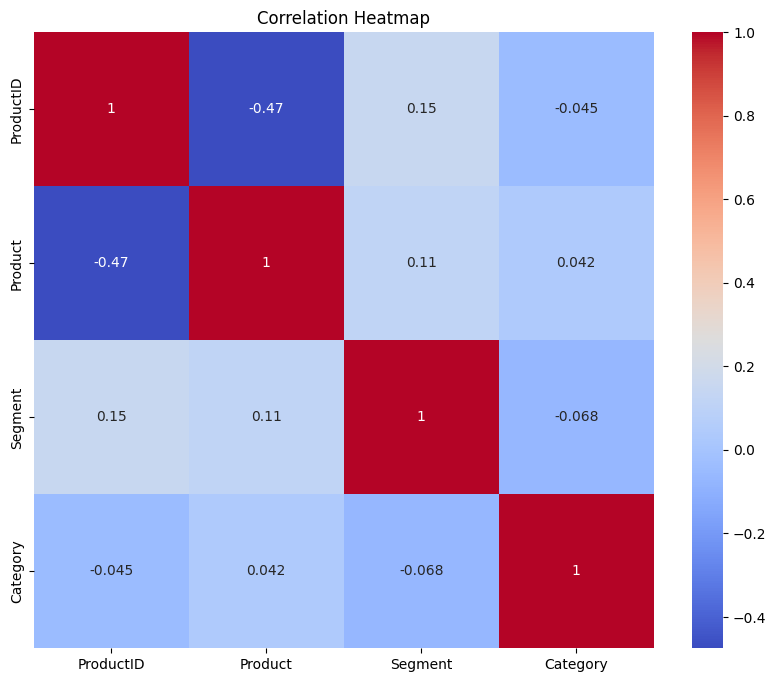

In [ ]:
train['ProductID'] = le.fit_transform(train['ProductID'])
train['Product'] = le.fit_transform(train['Product'])
train['Segment'] = le.fit_transform(train['Segment'])
train['Category'] = le.fit_transform(train['Category'])
corr = train[['ProductID', 'Product', 'Segment', 'Category']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()